# Introduction - cf-python and cf-plot

## The cf in cf-python and cf-plot are to indicate that they are underpined by CF - Climate and Forecast (CF) Metadata Conventions. http://cfconventions.org

## cf-python - The python cf package implements the CF data model for the reading, writing and processing of data and metadata. https://cfpython.bitbucket.io

## cf-plot - A set of Python routines for making the common contour, vector and line plots that climate researchers use. can also plot Numpy arrays of data. http://ajheaps.github.io/cf-plot
            
            

# Read, select, write example

In [25]:
# Inline images in Ipython Notebook - not needed in Python
%matplotlib inline

In [2]:
# Import cf-python and cf-plot
import cf
import cfplot as cfp
cf.__version__

'3.0.1'

In [3]:
# Read a data file
f=cf.read('ncas_data/data1.nc')

In [4]:
# View the contents of the file
f


[<CF Field: divergence_of_wind(time(1), pressure(23), latitude(160), longitude(320)) s**-1>,
 <CF Field: long_name=Ozone mass mixing ratio(time(1), pressure(23), latitude(160), longitude(320)) kg kg**-1>,
 <CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: specific_humidity(time(1), pressure(23), latitude(160), longitude(320)) kg kg**-1>,
 <CF Field: relative_humidity(time(1), pressure(23), latitude(160), longitude(320)) %>,
 <CF Field: atmosphere_relative_vorticity(time(1), pressure(23), latitude(160), longitude(320)) m**2 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: atmosphere_relative_vorticity(time(1), pressure(23), latitude(160), longitude(320)) s**-1>,
 <CF Field: d

In [14]:
# Select the air temperature
temp=f.select('air_temperature')[0]
print(temp)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



In [7]:
# Select by index
temp=f[2]
print(temp)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



In [9]:
# Select by long_name
vorticity=f.select('long_name=Potential vorticity')[0]

In [11]:
# See a longer list of field contents
print(vorticity)


Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



In [12]:
# Change the standard_name of the field
vorticity.standard_name='ertel_potential_vorticity'

# View properties
vorticity.properties


<bound method Properties.properties of <CF Field: ertel_potential_vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>>

In [13]:
# Write the modified field to a netCDF file
cf.write(vorticity, 'newfile.nc')

# Contour plots

In [17]:
# Use subspace to select the temperature at 500mb
t_500=temp.subspace(Z=500)
print(t_500)


Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(1), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(1) = [500.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


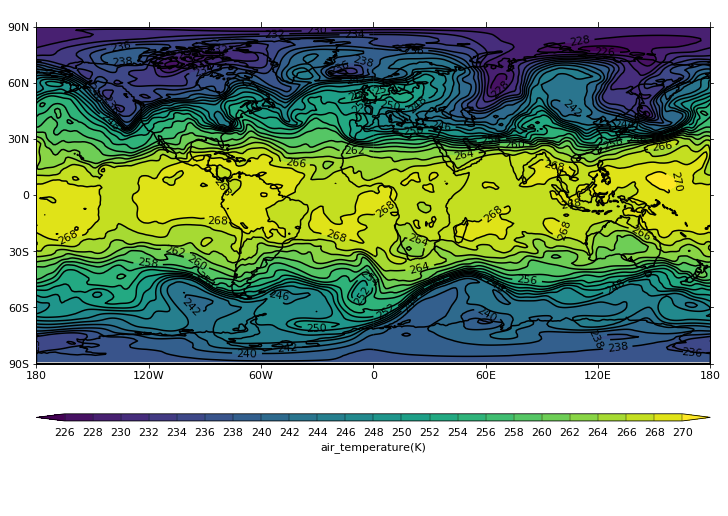

In [18]:
#Make a contour plot of the data
cfp.con(t_500)


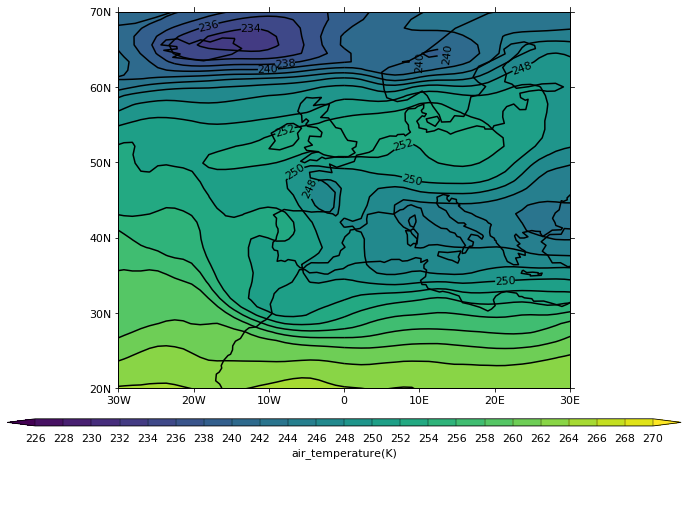

In [19]:
# Use mapset to select Europe and make a new contour plot
cfp.mapset(lonmin=-30, lonmax=30, latmin=20, latmax=70)
cfp.con(t_500)


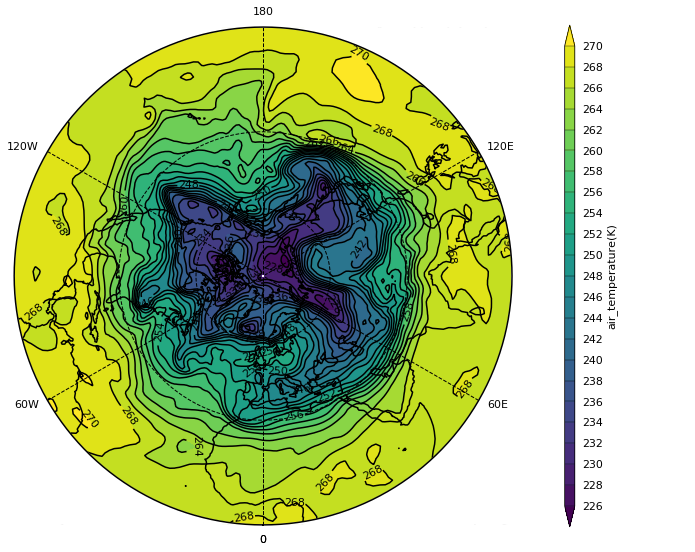

In [20]:
# Make a Northern Hemiphere polar stereographic plot
cfp.mapset(proj='npstere')
cfp.con(t_500)
cfp.mapset()


In [22]:
# Select the zonal wind and make a zonal mean of this using the collapse function in cf-python
u=f.select('eastward_wind')[0]
u_mean=u.collapse('mean', 'longitude')
print(u_mean)


Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(1)) m s**-1
Cell methods    : longitude(1): mean
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(1) = [179.4375] degrees_east



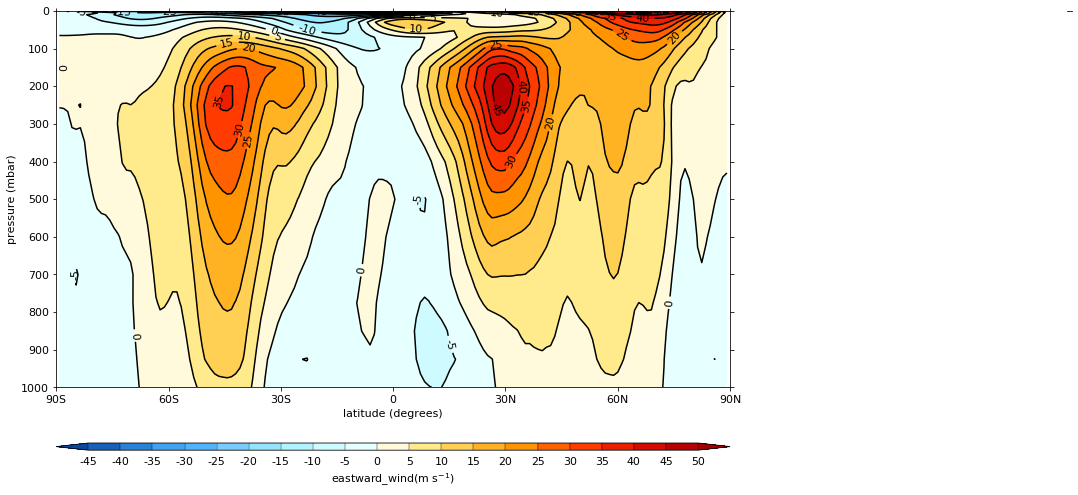

In [23]:
# Make a zonal mean zonal wind plot
cfp.con(u_mean)


In [ ]:
# Make a log y-axis plot of the zonal mean zonal wind
cfp.con(u_mean, ylog=True)


# Vector plots

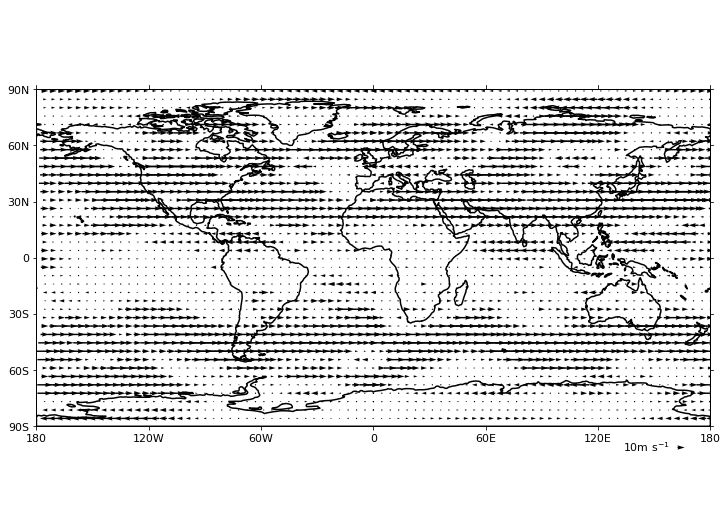

In [26]:
# Select u and v wind components at 500mb and make a vector plot
# We use a stride of 4 in plotting the vectors as the points are close together
u=f[7].subspace(pressure=500)
v=f[9].subspace(pressure=500)
cfp.vect(u=u, v=v, key_length=10, scale=100, stride=4)


# Line plots

In [28]:
# Select the zonal mean zonal wind at 100mb
u=f[7]
u_mean=u.collapse('X: mean')
u_mean_100=u_mean.subspace(pressure=100)
print(u_mean_100)


Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(1), latitude(160), longitude(1)) m s**-1
Cell methods    : longitude(1): mean
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(1) = [100.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(1) = [179.4375] degrees_east



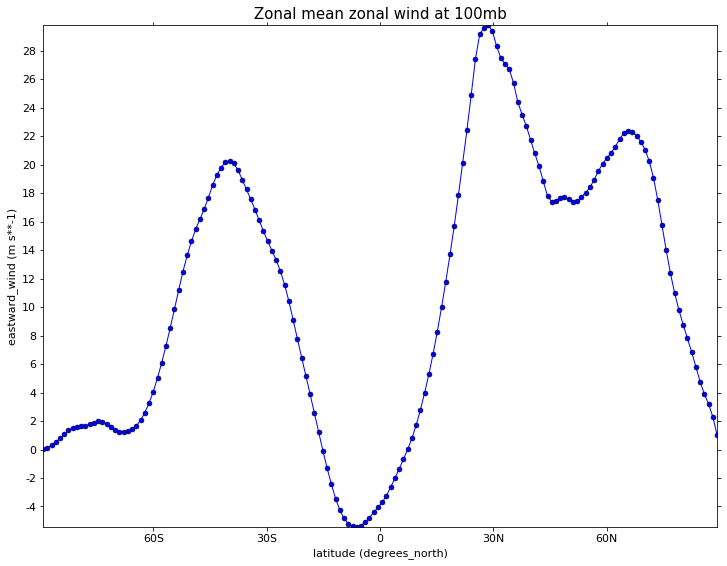

In [29]:
cfp.lineplot(u_mean_100, marker='o', color='blue', title='Zonal mean zonal wind at 100mb')


# Regridding
Regrid some temperature longitude-latiude data to another grid and make a plot of the difference between the two datsets.

In [37]:
# Read in data on two different grids
temp_era40=cf.read_field('ncas_data/data2.nc')
temp_era_in=cf.read('ncas_data/data3.nc')

print(temp_era40, temp_era_in)


AttributeError: module 'cf' has no attribute 'read_field'

In [36]:
# Perform the regridding
temp_regrid = temp_era_in.regrids(temp_era40, method='bilinear')


AttributeError: 'FieldList' object has no attribute 'regrids'

In [ ]:
# Make a contour plot of the difference between the two datasets
cfp.con(temp_regrid-temp_era40, lines=False, title='era_interim - era40 difference')
